In [85]:
# Goal plot the BB fits to the spectra
import matplotlib.pyplot as plt
import astropy.table as table
import numpy as np
import astropy.constants as const
import astropy.units as u

from scipy.interpolate import BSpline, make_lsq_spline
from scipy.interpolate import CubicSpline

In [104]:
x = table.Table.read('../products/specs/bbfit.fits')
x

<Table length=26>
       phase                logz        ... instrument int_flux_mismatch 
      float64             float64       ...   bytes1        float64      
------------------- ------------------- ... ---------- ------------------
-18.210428240709007 -24.090732262325055 ...                           nan
-17.147404259070754   -13.6783579407864 ...                           nan
-16.916725694201887 -13.028752154294036 ...                           nan
-15.194287037011236  -17.23793240242839 ...                           nan
-13.007756041828543 -21.018944251803948 ...            1.0351870947533848
-12.200670138932765  -15.12271500207135 ...                           nan
 -9.388772106263787 -11.145418837116026 ...                           nan
 -8.166097222361714   -9.86175326817085 ...                           nan
 0.9335266202688217   -9.88191914994181 ...                           nan
  7.950689814984798 -10.960441863729748 ...                           nan
                ...                 ... ...        ...                ...
 42.659954907372594 -14.414095237107842 ...                           nan
 47.777202546130866 -14.089143922071445 ...                           nan
  55.71297106472775 -16.239697683238823 ...                           nan
  62.77637847233564  -18.45040072965433 ...                           nan
  74.55890408577397  -24.91490462957499 ...                           nan
  75.88669212954119  -32.46847591646597 ...                           nan
  99.72989005502313  -68.27780657094958 ...                           nan
 102.79355089971796 -51.874239815469515 ...                           nan
 116.76801736094058 -31.919971773725305 ...                           nan
 136.85717824054882  -66.57685398817544 ...                           nan

In [105]:
d = x[x['phase'] < 50]
yerr = d['radius_q95']-d['radius_q5']
plt.figure(figsize=(10, 7))
plt.errorbar(d['phase'], d['radius_mean'], yerr=yerr, fmt='o')
plt.xlabel('Phase [d]')
plt.ylabel('Radius [cm]')
ln_v_c = 19.94
t_expl = -28.92
t = np.linspace(-20, 50)
r_c = np.exp(ln_v_c)*(t-t_expl)*24*3600
plt.plot(t, r_c)

ln_v_c = 19.97 - 0.95/2
t_expl = -28.92-9.54
t = np.linspace(-20, 50)
r_c = np.exp(ln_v_c)*(t-t_expl)*24*3600
plt.plot(t, r_c)

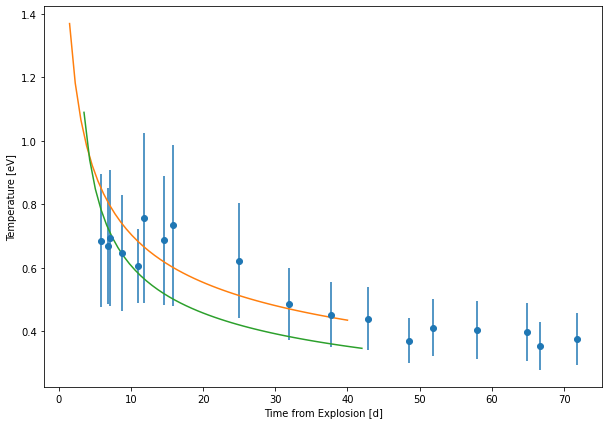

In [118]:
d = x[x['phase'] < 50]

k_b = 8.617e-5 # eV/K

yerr = d['temp_q95']-d['temp_q5']
plt.figure(figsize=(10, 7))
plt.errorbar(d['phase']+24, d['temp_mean']*k_b, yerr=yerr*k_b, fmt='o')
plt.xlabel('Time from Explosion [d]')
plt.ylabel('Temperature [eV]')
t = np.linspace(1.5, 40)*24*3600
t5 = t/1e5
r_pro12 = 1
tph = 1.5*1*1*r_pro12**0.19 * t5**(-0.35)
plt.plot(t/24/3600, tph)
r_pro12 = 0.3
tph = 1.5*1*1*r_pro12**0.19 * t5**(-0.35)
plt.plot(t/24/3600+2, tph)


In [ ]:
from astropy.cosmology import Planck15 as cosmo
dist = cosmo.luminosity_distance(0.014353).to(u.cm) * 

In [12]:
C1 = 2.0 * const.h.cgs * const.c.cgs**2
C2 = const.h.cgs * const.c.cgs / const.k_B.cgs

In [13]:
C1

<Quantity 1.19104297e-05 cm2 erg / s>

In [14]:
C2

<Quantity 1.43877688 cm K>

In [31]:
wavelength = np.linspace(1000, 9000)*u.Angstrom
temperature = 5000 * u.K

wavelength = u.Quantity(wavelength, unit=u.cm)
temperature = u.Quantity(temperature, unit=u.K)

In [32]:
B_lambda = (C1 / wavelength**5) / \
               (np.expm1(C2 / (wavelength * temperature))) / u.sr
B_lambda

<Quantity [3.79201686e+07, 1.01029759e+09, 1.10022767e+10, 6.63525925e+10,
           2.65787519e+11, 7.93515824e+11, 1.90591253e+12, 3.88152119e+12,
           6.95727836e+12, 1.12769851e+13, 1.68664180e+13, 2.36357476e+13,
           3.14014963e+13, 3.99179635e+13, 4.89096505e+13, 5.80992568e+13,
           6.72287352e+13, 7.60730056e+13, 8.44471721e+13, 9.22086364e+13,
           9.92555883e+13, 1.05523201e+14, 1.10978591e+14, 1.15615326e+14,
           1.19448010e+14, 1.22507281e+14, 1.24835396e+14, 1.26482471e+14,
           1.27503386e+14, 1.27955300e+14, 1.27895722e+14, 1.27381054e+14,
           1.26465533e+14, 1.25200499e+14, 1.23633929e+14, 1.21810167e+14,
           1.19769821e+14, 1.17549775e+14, 1.15183284e+14, 1.12700134e+14,
           1.10126835e+14, 1.07486845e+14, 1.04800801e+14, 1.02086756e+14,
           9.93604089e+13, 9.66353305e+13, 9.39231752e+13, 9.12338810e+13,
           8.85758550e+13, 8.59561443e+13] erg / (cm3 s sr)>

In [33]:
B_lambda = B_lambda.to(u.erg / (u.s * u.cm**2 * u.AA * u.sr))
B_lambda

<Quantity [3.79201686e-01, 1.01029759e+01, 1.10022767e+02, 6.63525925e+02,
           2.65787519e+03, 7.93515824e+03, 1.90591253e+04, 3.88152119e+04,
           6.95727836e+04, 1.12769851e+05, 1.68664180e+05, 2.36357476e+05,
           3.14014963e+05, 3.99179635e+05, 4.89096505e+05, 5.80992568e+05,
           6.72287352e+05, 7.60730056e+05, 8.44471721e+05, 9.22086364e+05,
           9.92555883e+05, 1.05523201e+06, 1.10978591e+06, 1.15615326e+06,
           1.19448010e+06, 1.22507281e+06, 1.24835396e+06, 1.26482471e+06,
           1.27503386e+06, 1.27955300e+06, 1.27895722e+06, 1.27381054e+06,
           1.26465533e+06, 1.25200499e+06, 1.23633929e+06, 1.21810167e+06,
           1.19769821e+06, 1.17549775e+06, 1.15183284e+06, 1.12700134e+06,
           1.10126835e+06, 1.07486845e+06, 1.04800801e+06, 1.02086756e+06,
           9.93604089e+05, 9.66353305e+05, 9.39231752e+05, 9.12338810e+05,
           8.85758550e+05, 8.59561443e+05] erg / (Angstrom cm2 s sr)>

In [34]:
(1/u.cm).to(1/u.Angstrom)

<Quantity 1.e-08 1 / Angstrom>

In [78]:
#k = 1

#t = [-40, -20, -15, -10, -5, 0, 5, 10, 15, 20, 30,40, 60]

# try to produce smoothed LC
d = x[x['phase'] < 50]
yerr = d['radius_q95']-d['radius_q5']
plt.figure(figsize=(10, 7))
#plt.errorbar(d['phase'], d['radius_mean'], yerr=yerr, fmt='o')
#spl = make_lsq_spline(d['phase'], d['radius_mean'], t, k)
spl = CubicSpline(d['phase'], d['radius_mean'])
t = np.linspace(-18, 40)
spline = spl(t)
#plt.plot(t, spline)
plt.plot(t[1:], np.diff(spline)*(u.cm.to(u.km))/np.diff(t)/24/3600)
#np.diff(t)

In [65]:
np.any(d['phase'] < t[k])

True

Text(0, 0.5, 'log L')

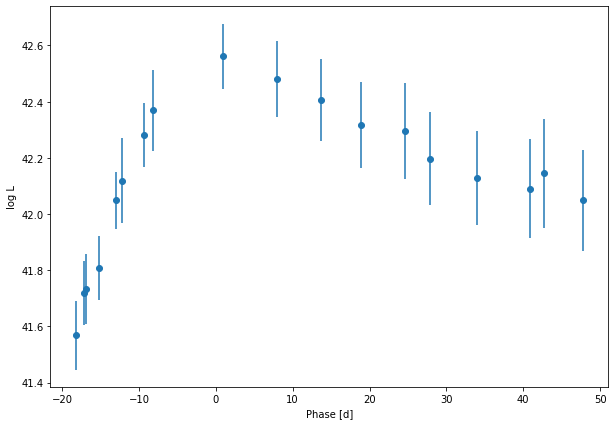

In [89]:
d = x[x['phase'] < 50]
yerr = d['log_lum_q95']-d['log_lum_q5']
plt.figure(figsize=(10, 7))
plt.errorbar(d['phase'], d['log_lum_q50'], yerr=yerr, fmt='o')
plt.xlabel('Phase [d]')
plt.ylabel('log L')

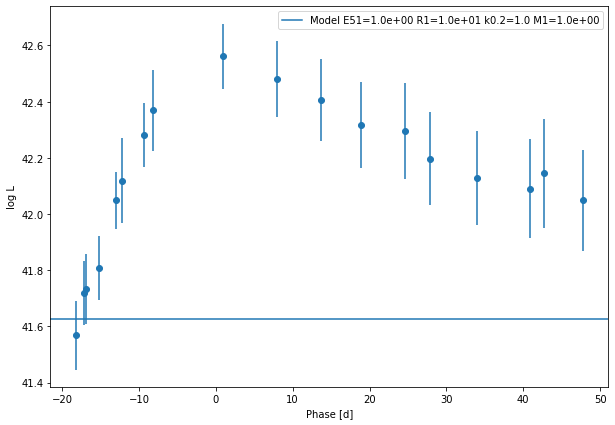

In [98]:
def plot_plateau(e51, r1, kappa02, m1):
    l = np.log10(e51**0.85 * r1 ** 0.78 / kappa02 ** 0.69 / m1 ** 0.67)
    log_l = np.log10(7e40) + l
    plt.axhline(y=log_l, label='Model E51=%.1e R1=%.1e k0.2=%.1f M1=%.1e' % (e51, r1, kappa02, m1))

d = x[x['phase'] < 50]
yerr = d['log_lum_q95']-d['log_lum_q5']
plt.figure(figsize=(10, 7))
plt.errorbar(d['phase'], d['log_lum_q50'], yerr=yerr, fmt='o')
plt.xlabel('Phase [d]')
plt.ylabel('log L')
plot_plateau(1,10,1,1)
plt.legend()

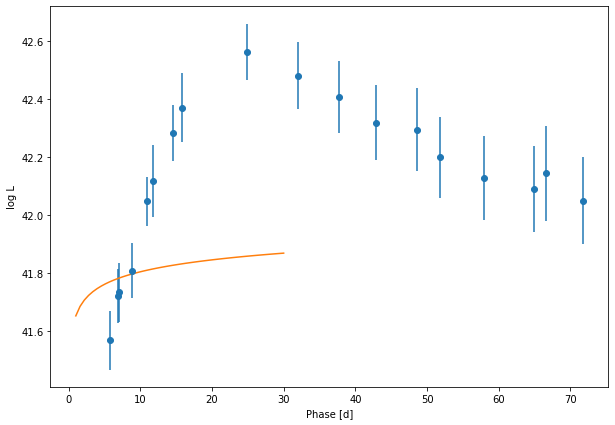

In [128]:
d = x[x['phase'] < 50]
yerr = d['log_lum_q95']-d['log_lum_q5']
plt.figure(figsize=(10, 7))
plt.errorbar(d['phase']+24, d['log_lum_q50'], yerr=yerr, fmt='o')
plt.xlabel('Phase [d]')
plt.ylabel('log L')

e51=4
r_pro13 = 0.05
m_ratio = 5

t = np.linspace(1,30)*24*3600
t5 = t/1e5
tday = t/24/3600
l = np.log10(4.7e42) + np.log10(e51**0.83 * r_pro13**0.8 / m_ratio ** 0.67 ) * t5**(-0.07)
plt.plot(tday, l)

In [134]:
# load photometry file
photbb = table.Table.read('2021-05-25-phot-bbfit-1621978366.fits')
photbb

<Table length=28>
       mjd               phase        ...      lum_q95            lum_q50      
     float64            float64       ...      float64            float64      
----------------- ------------------- ... ------------------ ------------------
58716.38879999984 -17.611200000159442 ...   41.6433958713177  41.60519631149332
58717.38879999984 -16.611200000159442 ...  41.75887169165114 41.712328913247276
58718.38879999984 -15.611200000159442 ... 41.866373883174106  41.82440261275428
58719.38879999984 -14.611200000159442 ...  41.96951436187212  41.92889923485832
58720.38879999984 -13.611200000159442 ... 42.063075247069165  42.02386285123776
58721.38879999984 -12.611200000159442 ...  42.14222534780504  42.10659690686335
58722.38879999984 -11.611200000159442 ...  42.21367059618519  42.18136091207279
58723.38879999984 -10.611200000159442 ... 42.271307047267165 42.243973622249925
58724.38879999984  -9.611200000159442 ...  42.32601440378011  42.30143827388726
58725.38879999984  -8.611200000159442 ... 42.376037893245694   42.3538627043307
              ...                 ... ...                ...                ...
58734.38879999984  0.3887999998405576 ...  42.57865188885703 42.570953121262264
58735.38879999984  1.3887999998405576 ... 42.575567329674875  42.56894066187181
58736.38879999984  2.3887999998405576 ...  42.56991932292527  42.56370597214298
58737.38879999984  3.3887999998405576 ... 42.561778950375874  42.55641139128583
58738.38879999984   4.388799999840558 ...  42.55311970093618  42.54801603328081
58739.38879999984   5.388799999840558 ... 42.544393605525435  42.53890059162687
58740.38879999984   6.388799999840558 ...  42.53660769669672   42.5302772428234
58741.38879999984   7.388799999840558 ...  42.52912808738297  42.52202018463713
58742.38879999984   8.388799999840558 ... 42.522197702273616  42.51426312167115
58743.38879999984   9.388799999840558 ...  42.51541789718129  42.50700690257854

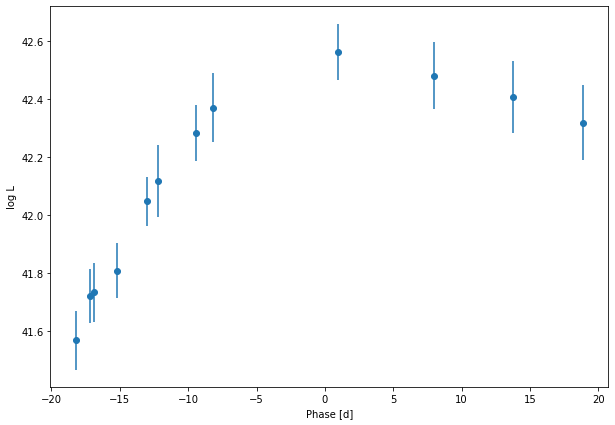

In [141]:
d = x[x['phase'] < 20]
yerr = d['log_lum_q95']-d['log_lum_q5']
plt.figure(figsize=(10, 7))
plt.errorbar(d['phase'], d['log_lum_q50'], yerr=yerr, fmt='o', label='Specs')
plt.xlabel('Phase [d]')
plt.ylabel('log L')

yerr = photbb['lum_q95']-photbb['lum_q5']
#plt.errorbar(photbb['phase'], photbb['lum_q50'], yerr=yerr, fmt='o', label='Phot')

<ErrorbarContainer object of 3 artists>

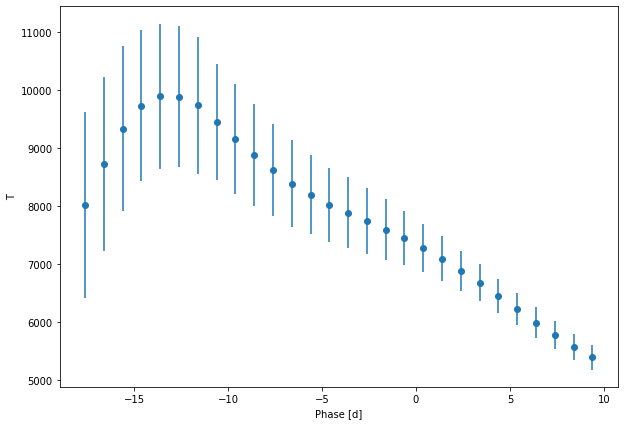

In [139]:
d = x[x['phase'] < 30]
yerr = d['temp_q95']-d['temp_q5']
plt.figure(figsize=(10, 7))
#plt.errorbar(d['phase'], d['temp_mean'], yerr=yerr, fmt='o', label='Specs')
plt.xlabel('Phase [d]')
plt.ylabel('T')

yerr = photbb['temp_q95']-photbb['temp_q5']
plt.errorbar(photbb['phase'], photbb['temps_q50'], yerr=yerr, fmt='o', label='Phot')